In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# This notebook is just to visualize some of the data needed for reranking with metadata

metadata = pd.read_csv("data/posts.csv")
users = pd.read_csv("data/users.csv")

#some feature engineering
today = datetime.today().date() 
metadata["creationdate"] = pd.to_datetime(metadata["creationdate"], errors='coerce')  # Keep datetime format
metadata["days_since_creation"] = (datetime.today() - metadata["creationdate"]).dt.days  # Extract only days
metadata["reputation_user"]= metadata["owneruserid"].map(users.set_index('id')['reputation'])
metadata = metadata[["id", "days_since_creation", "score", "viewcount", "commentcount", "reputation_user"]]

#save in file with metadata
metadata.to_csv("data/metadata_processed.csv", index=False)
metadata.head()

,id,days_since_creation,score,viewcount,commentcount,reputation_user
0,419043,5877.0,2,NaN,0,817238.0
1,419044,5877.0,1,3891.0,2,NaN
2,419045,5877.0,1,3192.0,0,3986.0
3,419046,5877.0,6,NaN,1,10807.0
4,419048,5877.0,2,NaN,0,1148.0


In [4]:
metadata.describe()

,id,days_since_creation,score,viewcount,commentcount,reputation_user
count,1.000000e+06,996630.000000,1000000.000000,2.694170e+05,1000000.000000,9.421190e+05
mean,1.150511e+06,5689.255685,10.386695,1.671508e+04,1.085619,7.603676e+04
std,3.587366e+05,81.425333,93.338107,1.014582e+05,1.926449,1.803841e+05
min,4.190430e+05,5169.000000,-35.000000,1.800000e+01,0.000000,1.000000e+00
25%,8.436358e+05,5619.000000,0.000000,6.830000e+02,0.000000,3.849000e+03
50%,1.152232e+06,5683.000000,2.000000,2.048000e+03,0.000000,1.544400e+04
75%,1.460230e+06,5755.000000,5.000000,6.800000e+03,2.000000,5.666600e+04
max,4.458539e+06,5877.000000,28828.000000,1.396275e+07,90.000000,1.457162e+06


Column days_since_creation: 0 outliers removed
Column score: 2823 outliers removed
Column viewcount: 3501 outliers removed
Column commentcount: 0 outliers removed
Column reputation_user: 3116 outliers removed
Column id : 0 missing values
Column days_since_creation : 0 missing values


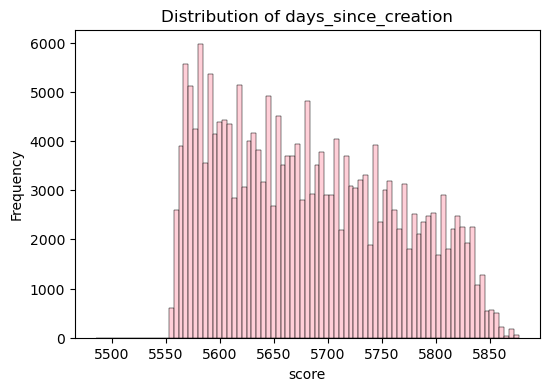

Column score : 0 missing values


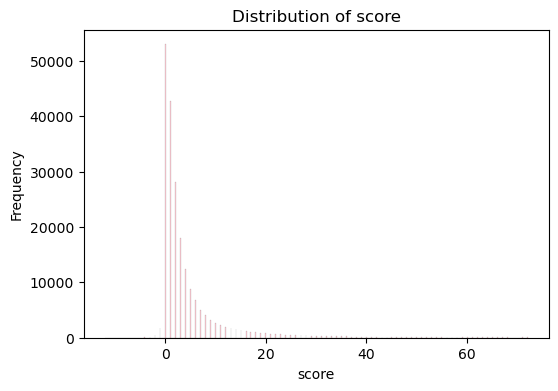

Column viewcount : 0 missing values


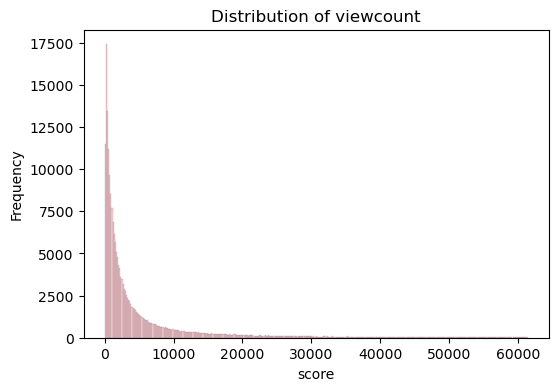

Column commentcount : 0 missing values


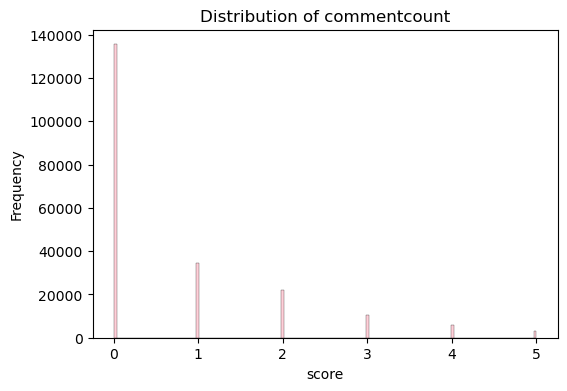

Column reputation_user : 0 missing values


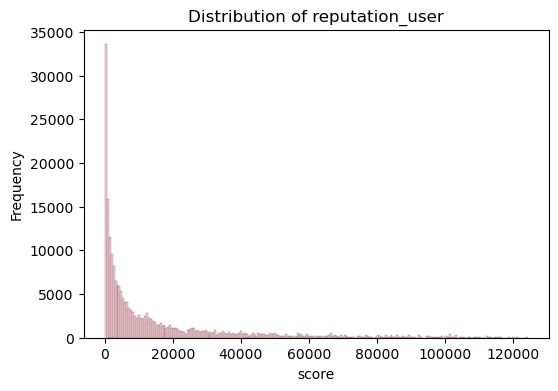

In [6]:
#very skewed data - want to see distributions
def remove_outliers(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != "id":
            mean, std = df[col].mean(), df[col].std()
            mask = (df[col] >= mean - 4 * std) & (df[col] <= mean + 4 * std)
            outlier_count = (~mask).sum()
            outlier_counts[col] = outlier_count
            df = df[mask]
    return df, outlier_counts

#remove outliers
metadata, outlier_counts = remove_outliers(metadata)

# Print number of outliers per column
for col, count in outlier_counts.items():
    print(f"Column {col}: {count} outliers removed")

# Check missing values and plot distributions
for col in metadata.columns:
    print(f"Column {col} : {metadata[col].isnull().sum()} missing values")
    if col != "id":
        plt.figure(figsize=(6, 4))
        value_counts = metadata[col].value_counts()
        sns.histplot(metadata[col], color="pink")
        plt.title(f"Distribution of {col}")
        plt.xlabel("score")
        plt.ylabel("Frequency")
        plt.show()

